# Aim

In this assignment, we aimed to interpreate a news article as a machine learning problem.
- 1- Scrape news articles from UCD website and pre-process the text data.
- 2- Train mechine learning models that classifies the news article as politics, US_News and UK News using binary & multi classifiction.
- 3- Testing the performance of our model.

In [1]:
#import packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pprint
import sys

# Task 1: Data Collection

## 1-1: Data Selection

3 categories were selected as:
*  Politics
*  UK_News
*  US_News

## 2-1: Data Scraping

From [ this link ](http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html),details regarding all stories corresponding to selected categories from Jan 2020 to Dec 202 was retrived.

Data Scrapping Method:

* 1- Define 'base_url'.
* 2- Using Beautifulsoup and send a request to the base_url and collect all contents and recieve text and change it to an object that could be manipulated (HTML Format).
* 3- Defining 3 empty lists to collect titles, categories and snippests of the news.
* 4- Inside the 'base url', 12 months with 12 seprated links observed. Based on observation inside soup.prettify(), all these Hypertext REFerence (hrefs) located in <a tag, so we stored them in next_link variable.
* 5- All of these 12 links include multiple pages.The code designed in the way that could scrap all of these pages:
    * 5-1 : Definig soup varible to read contents of next link
    * 5-2 : In <ul class: "Pagination" section, what we see is that in <a Class = "page_link" href = "url" aria-label = "Next" exist. While, when we go to the last page in each month, we see that for the last page the href = #. In this way, the next 'next_link' is used for going to next link (next page), and we continue this untill seeing # which means that we reach the last page!
* 6- We only scraps titles, categories and snippest, and all of these were located under the ('div', class_ = 'article')section, so we find them and append them to defined list.
* 7- All of the collected data stored in DF and changed to .CSV format                                                                          
                                                                          

In [2]:
# Requesting & Parsing the Data
base_url = "http://mlg.ucd.ie/modules/COMP41680/assignment2/"
soup = BeautifulSoup(requests.get(base_url + "index.html").content, "html.parser")
#print(soup.prettify())

# Creating list of all 3 featres we need to extract
title_news = []
category_news = []
snippet_news = []

for a in soup.select("#all a"):
    next_link = a["href"]
   
    print("Scrapping", base_url + next_link)

    while True:
        soup = BeautifulSoup(requests.get(base_url + next_link).content, "html.parser")
        
       
        news_div = soup.find_all('div', class_ = 'article')
                   
        for container in news_div:
            
# Categpry Extraction
        # Data we need to find is in a <span> tag with a class of <metadata'
            category = container.select("p")[1].text.split(' ', 1)[1]   
            if category == 'UK-News' or category == 'US-News' or category =='Politics':
                category_news.append(category)

# Title Extrction
        # The title of news are located under <h5> <a
                title = container.h5.a.text # inside the news_div grab the text of a tag
                title_news.append(title)
            
# snippet Extrction
                snippet = container.select_one('p.snippet').text
                snippet_news.append(snippet)
  
        next_link = soup.select_one('a[aria-label="Next"]')["href"]      
    
        if next_link == "#":
            break

Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-001.html
Scrapping http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-001.html


## 3-1: Data Storage

In this section, I store the collected data in DataFrame format. 

In [3]:
sys.getfilesystemencoding()

'utf-8'

In [4]:
news = pd.DataFrame(
{
    'Titles' : title_news,
    'Snippet' : snippet_news,
    'Label' : category_news,
})
news.to_csv('newsdata.csv', index = False, encoding = 'utf-8-sig')

# Task 2: Binary Classification

In [345]:
# Importing all required libraries

# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
# Calculating TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string

# Removing Stop Words, stemmer and word tokenizer
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Modes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

In [6]:
# downloading stop words
#nltk.download_shell()
# download NLT (tokenizer)
#nltk.download('punkt')

## <font color='green'> i. Data Preperation & Visualisation</font>

## 1-2: Coding and Testing

### 1-2-1:Reading the Scrape Data

In [7]:
news_df = pd.read_csv('newsdata.csv')

In [8]:
news_df.head()

,Titles,Snippet,Label
0,"Let's resolve to reconnect, says Welby in new ...",The archbishop of Canterbury will urge people ...,UK-News
1,The final sprint: will any of the Democratic c...,Democrats overwhelmingly agree that their top ...,US-News
2,Clive Lewis calls for unity among Labour leade...,Summary: The Labour leadership hopeful Clive L...,Politics
3,Visa applications: Home Office refuses to reve...,Summary: Campaign groups have criticised the H...,UK-News
4,Victims of NYE Surrey road crash were BA cabin...,At least seven people have been killed across ...,UK-News


### 1-2-2: Exploring Dataset

- **Describing News Dataset:**

In this section, we aimed to explore our dataset. We have 3 labels, and the number of unique news is eual to count which means that we have not extracted duplicated news and we have 5,418 news.

In [9]:
news_df.describe()

,Titles,Snippet,Label
count,5418,5418,5418
unique,5418,5416,3
top,Geoffrey Cox signals he would accept lead role...,Boris Johnson is asking the EU for a Canada-st...,US-News
freq,1,2,1815


Then, all the news articles are grouped by the news categories (labels) to see how many news we have scrapped for Politics, UK & US news. US news had more titles comparing to the other labels. In the top column, more important message has been displayed, and seems Donald Trump related news is famous in US.

In [10]:
news_df.groupby('Label').describe()

Titles                                                            \
          count unique                                                top   
Label                                                                       
Politics   1808   1808  Geoffrey Cox signals he would accept lead role...   
UK-News    1795   1795  Coronavirus: hunting exempt from 'rule of six'...   
US-News    1815   1815  Tulsi Gabbard quits 2020 Democratic presidenti...   

              Snippet         \
         freq   count unique   
Label                          
Politics    1    1808   1806   
UK-News     1    1795   1795   
US-News     1    1815   1815   

                                                                  
                                                        top freq  
Label                                                             
Politics  Boris Johnson is asking the EU for a Canada-st...    2  
UK-News   Summary: Just over 17% of racially aggravated ...    1  
US-News   While the world’s attention is on Donald Trump...    1

- **Adding New Features:**

Two columns added to figure out the lenght of titles & Snippet

In [11]:
news_df['Lenght_Titles'] = news_df['Titles'].apply(len)
news_df['Lenght_Snippest'] = news_df['Snippet'].apply(len)

In [12]:
news_df.head()

,Titles,Snippet,Label,Lenght_Titles,Lenght_Snippest
0,"Let's resolve to reconnect, says Welby in new ...",The archbishop of Canterbury will urge people ...,UK-News,58,151
1,The final sprint: will any of the Democratic c...,Democrats overwhelmingly agree that their top ...,US-News,70,152
2,Clive Lewis calls for unity among Labour leade...,Summary: The Labour leadership hopeful Clive L...,Politics,60,161
3,Visa applications: Home Office refuses to reve...,Summary: Campaign groups have criticised the H...,UK-News,70,161
4,Victims of NYE Surrey road crash were BA cabin...,At least seven people have been killed across ...,UK-News,51,152


- **Visualisation:**

In [13]:
news_df['Lenght_Titles'].describe()

count    5418.000000
mean       68.884828
std        13.298813
min        17.000000
25%        62.000000
50%        68.000000
75%        75.000000
max       134.000000
Name: Lenght_Titles, dtype: float64

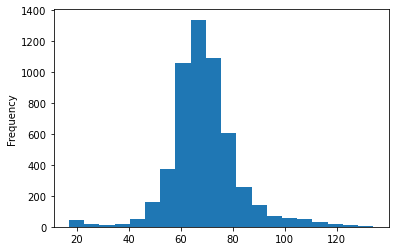

In [14]:
news_df['Lenght_Titles'].plot.hist(bins=20); # lenght of titles are following 'Normal Distribution'

In [15]:
news_df['Lenght_Snippest'].describe()

count    5418.000000
mean      153.525102
std         3.536019
min       151.000000
25%       152.000000
50%       152.000000
75%       152.000000
max       161.000000
Name: Lenght_Snippest, dtype: float64

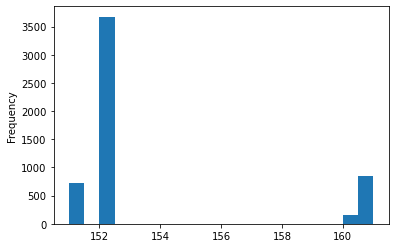

In [16]:
news_df['Lenght_Snippest'].plot.hist(bins=20);

For both the snippest + titles, the longest lenght news are displayed as textstabels:
UK COVID-19 news had the longeest title news

In [17]:
news_df[news_df['Lenght_Titles'] == 134] ['Titles'].iloc[0] # Printing out the entire string

'UK coronavirus: Grant Shapps denies chief nurse dropped from No 10 briefing ‘after refusing to back Dominic Cummings’ — as it happened'

In [18]:
news_df [news_df['Lenght_Snippest'] == 161]['Snippet']

2       Summary: The Labour leadership hopeful Clive L...
3       Summary: Campaign groups have criticised the H...
19      Summary: Sir Keir Starmer, the favourite to su...
24      Summary: A series of high temperature records ...
36      Summary: A former Fox News reporter has added ...
                              ...                        
5393    Summary: Diana, Princess of Wales, dismissed c...
5399    Summary: Who would have guessed? When push cam...
5401    Summary: Most of the sprawling industrial esta...
5410    Summary: Boris Johnson’s father Stanley has co...
5413    Summary: Joe Biden is expected to receive Secr...
Name: Snippet, Length: 854, dtype: object

For having a better understanding of the lenght of news for all of the 3 categories, we show lenght of titles & Lenght of snippest on X Axis and seprated them by Politics, UK and US news.
A normal distribution histogram trend observed for all of the 3 labels, and it seems that US-News using titles with more description comparing to the other labels. It seems that lenght feature is not good feature for distinguishing different news types, since all of them are almost in the same range

C:\Users\Negee\New folder\envs\geo_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


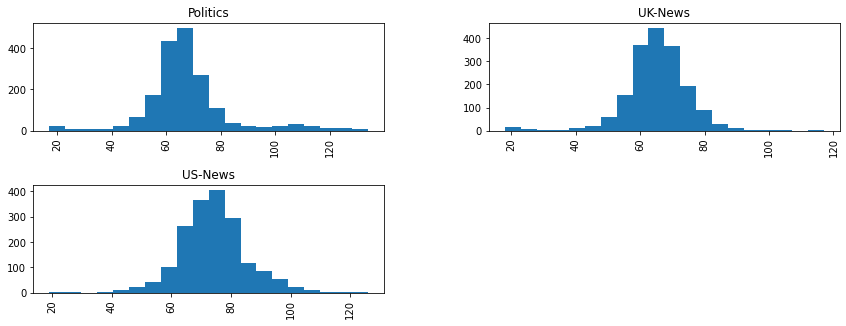

In [19]:
news_df.hist(column ='Lenght_Titles', by = 'Label', bins = 20, figsize = (14,5));

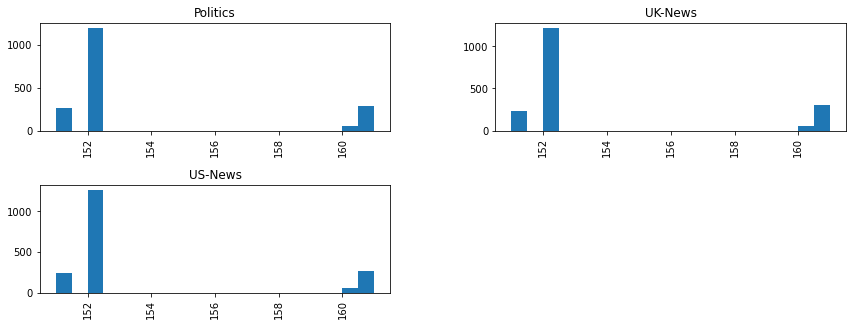

In [20]:
news_df.hist(column = 'Lenght_Snippest', by = 'Label', bins = 20, figsize = (14,5));

**Counting Number of News articles in each Labels**

In [21]:
number_of_US_News = news_df.Label.value_counts()[0]
number_of_Politics = news_df.Label.value_counts()[1]
number_of_UK_News  = news_df.Label.value_counts()[2]
print('Number_of_US_News: %s \nNumber_of_Politics: %s\nNumber_of_UK_News: %s\n'%(number_of_US_News,number_of_Politics,number_of_UK_News))

Number_of_US_News: 1815 
Number_of_Politics: 1808
Number_of_UK_News: 1795



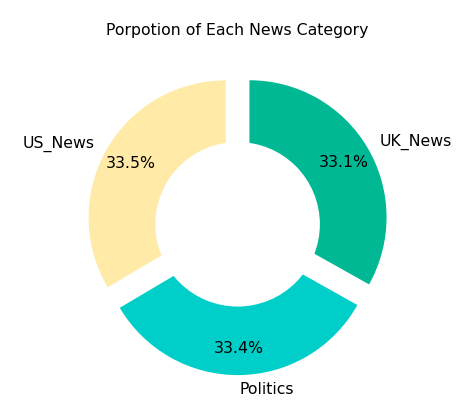

In [22]:
# Drawing pie chart of lengh news category and their labels

plt.figure(figsize = (2,2) , dpi = 227) # Seeting fig size and dpi
plt.rcParams['text.color'] = 'black'
# flatuicolors used for chosing colors(https://flatuicolors.com/)
pie_color = ['#ffeaa7','#00cec9','#00b894']
plt.title('Porpotion of Each News Category', fontsize = 5)
plt.pie([number_of_US_News,number_of_Politics,number_of_UK_News] ,labels= ['US_News', 'Politics', 'UK_News'], textprops = {'fontsize': 5}, autopct='%1.1f%%',
         startangle= 90, colors = pie_color, pctdistance = 0.8, explode = [0.1,0.1,0.1]) # addig percent inside: autopct, rotating angle: startangle seprating pies : explode
# draw circle
centre_circle = plt.Circle((0,0), radius = 0.6, fc = 'white') # changing color whitte for midle circle
plt.gca().add_artist(centre_circle ) # adding circle to current axis
plt.show()

**Load the data from Task 1**


- **Corpus** : A large unstructured set of news articles (The collected Data) ---> **Document**: It refers to particular news title+Snippet  in our news courpse.
- Here, the main **aim** is to change this set of documents  (Corpuse) to particilar item (document) in our news corpus.

### Concanication Titles + Snippet

In [23]:
#  concatenation of the story’s title and text snippet
news_df ['Full_News'] = news_df['Titles'] + ' ' + news_df['Snippet']

In [24]:
# Checking if it concanicated properly
with pd.option_context('display.max_colwidth', None):
  display(news_df ['Full_News'][0])

"Let's resolve to reconnect, says Welby in new year message The archbishop of Canterbury will urge people to make personal connections with others in 2020 to create a new unity in a divided society. In his new …"

In [25]:
# Dropping unnecessary columns & adding news id
concat_data = news_df.drop(['Titles', 'Snippet', 'Lenght_Titles', 'Lenght_Snippest'], axis=1)
concat_data.head(3)

,Label,Full_News
0,UK-News,"Let's resolve to reconnect, says Welby in new ..."
1,US-News,The final sprint: will any of the Democratic c...
2,Politics,Clive Lewis calls for unity among Labour leade...


### Data Cleaning:

Based on the below two lines of codes, our news article dataset is clean and it doesnot requires any cleaning procedures for empty and NA values

In [26]:
# Checking if the data contains the Null Values
concat_data.isna().values.any()

False

In [27]:
# Checking if we have empty full news strings
# In above line of code, we only checked the NA values, while
# Here we want to check ' '  empty strings
(concat_data['Full_News'].str.len() == 0).any()

False

In [28]:
# Save full-news data in JSON format
concat_data.to_json( 'Full_Article_News.json')

# i. Natural Language Processing

## 2-2 : Text Pre-Processing 

### 2-2-1: Tokenization

In this regard, we changed a sequence of text in news to sequence of numbers.         **Tokenizing Text:** 
 - Raw text --> Individual tokens
 - Before creating of document term matrix, several steps including Case Conversion, Minimum term lenght, Stemming, lemmatisation, stop_word filtering and low frequency term filtering applied to reduce number of terms.

In [29]:
def news_reduction (news):
    '''
    1- Convert News to LowerCase Text
    2- Split up the text news
    3- Remove StopWords
    4- Remove Punctuation
    5- Stem the News words
    '''
    ## Tokenizing news article & Then changing to lower case text
    words = word_tokenize(news.lower())
    # Store all word in News Articles in a List                    
    filtered_words = []
    
    for word in words:
        # If news word in not included in stopword + punctuation
        if word not in set(stopwords.words ('english')) and word.isalpha():
                         
             # Stem the word
            filtered_words.append(PorterStemmer().stem(word))   
                         
    return filtered_words            

### Vocabularies Exist in News Articles

In [30]:
%%time 
# Apply the news reduction function to 'Full_News' Column 
news_list = concat_data.Full_News.apply(news_reduction)
# new_list is a nested list & need to be changed to single word
word_news_list = [item for sublist in news_list for item in sublist ]

Wall time: 7min 58s


In [31]:
concat_data

,Label,Full_News
0,UK-News,"Let's resolve to reconnect, says Welby in new ..."
1,US-News,The final sprint: will any of the Democratic c...
2,Politics,Clive Lewis calls for unity among Labour leade...
3,UK-News,Visa applications: Home Office refuses to reve...
4,UK-News,Victims of NYE Surrey road crash were BA cabin...
...,...,...
5413,US-News,Joe Biden to have new Secret Service team amid...
5414,UK-News,Police in Essex launch manhunt after pensioner...
5415,Politics,"Dover eerily quiet on Brexit eve, but hauliers..."
5416,US-News,Joe Biden to hold national memorial service fo...


In [32]:
# Getting unique sets of words in articles
unique_words = pd.Series(word_news_list).value_counts()
print('Nr of unique words', unique_words.shape[0])
unique_words.head()

Nr of unique words 10326


trump         1262
uk            1081
summari       1042
us             871
coronaviru     869
dtype: int64

In unique_words, news words form our index, and number of occurances is the values in this unique words series. As we see, Trump, UK, summari, US, COVID-19 are the most popular words in the news.
In below, we change the series to dataframe and assign word id to each news word

In [33]:
# Converting string to a list of tokens
# analyzer is used to add specific features that we included in above text_reduction function
#that does some kind of feature selection

In [34]:
%%time
tokenize = CountVectorizer(analyzer = news_reduction).fit_transform(concat_data.Full_News)

Wall time: 8min 10s


In [35]:
tokenize.shape

(5418, 10326)

### 2-2-2: Creating 3 Sets of Documents 

- Create a set of documents, one per news story. Each document should consist of the concatenation of the story’s title and text snippet. Each document should also have a class label, based on the story’s news category.
- For this part of assignment, below stepes are followed:
    - Realizing the index that refers to each News Lebel
    - Creating 3 labels that store these index
    - Using loc feature in series to only access the title +snippest in a list of strings

In [36]:
# Creating 3 varibles that can hold the index related to News Article Labels
doc_UK_index = concat_data[concat_data.Label == 'UK-News'].index
doc_US_index = concat_data[concat_data.Label == 'US-News'].index
doc_Politics_index = concat_data[concat_data.Label == 'Politics'].index

In [37]:
# Types of all of these 3 new variables are index, while News_list is series
doc_UK_index , type(doc_UK_index) , type (news_list)

(Int64Index([   0,    3,    4,    5,    6,    8,    9,   10,   11,   12,
             ...
             5387, 5389, 5390, 5391, 5393, 5394, 5398, 5401, 5407, 5414],
            dtype='int64', length=1795),
 pandas.core.indexes.numeric.Int64Index,
 pandas.core.series.Series)

In [38]:
UK = concat_data.loc[doc_UK_index] 
US = concat_data.loc[doc_US_index] 
Politics = concat_data.loc[doc_Politics_index] 

In [39]:
Politics

,Label,Full_News
2,Politics,Clive Lewis calls for unity among Labour leade...
7,Politics,Sadiq Khan pledges free London travel for disa...
14,Politics,"Whitehall reforms may lead to discrimination, ..."
17,Politics,Starmer says he wants Labour 'rebuilt ... as t...
19,Politics,Keir Starmer calls to rebuild party as 'force ...
...,...,...
5410,Politics,Stanley Johnson confirms application for Frenc...
5411,Politics,Tampon tax: government axes VAT on sanitary pr...
5412,Politics,UK residents: how will you be impacted by Brex...
5415,Politics,"Dover eerily quiet on Brexit eve, but hauliers..."


In [40]:
# Concanitaining pair of news articles and preparing them for training step
df_US_UK = pd.concat( [US, UK])
df_US_Politics = pd.concat ([US, Politics ])
df_UK_Politics = pd.concat ([UK, Politics ])
print('Number_of_US_News: %s \nNumber_of_Politics: %s\nNumber_of_UK_News: %s\n'%(US.Label.value_counts(),Politics.Label.value_counts(), UK.Label.value_counts()))
print ('Len Every two Categories US_UK , US_Politics, UK_Politics: ')
len (df_US_UK ) , len(df_US_Politics ) , len (df_UK_Politics)

Number_of_US_News: US-News    1815
Name: Label, dtype: int64 
Number_of_Politics: Politics    1808
Name: Label, dtype: int64
Number_of_UK_News: UK-News    1795
Name: Label, dtype: int64

Len Every two Categories US_UK , US_Politics, UK_Politics: 


(3610, 3623, 3603)

In [41]:
df_US_UK

,Label,Full_News
1,US-News,The final sprint: will any of the Democratic c...
20,US-News,Detroit firefighters face backlash over photo ...
22,US-News,Black people in California are stopped far mor...
27,US-News,Klobuchar took money from prosecutor condemned...
34,US-News,Fresno mass shooting: police arrest six suspec...
...,...,...
5394,UK-News,How Edward Heath taking a bath exposed Chequer...
5398,UK-News,UK weather: snow and ice to bring 2020 to wint...
5401,UK-News,'Happy vaccine day' at Welsh factory proudly p...
5407,UK-News,Tier 4 Covid rules in England: latest restrict...


### 2-2-3: Analysing 3 Documents By Vocabularies

In this section we would analyse:
- (1) : Total number of words
- (2) : Total number of unique words
- (3) : Top words

The interesting points are:

- US_News tend to use more words to announce their news

- Among all 38607 words exist in UK News, 455 words are unique and rest are duplicated. In **UK_NEWS**: CORONA VIRUS includes in top 5 repeated words

- Among all 5852 words exist in US News, 1229 words are unique and rest are duplicated. In **US_NEWS**: CORONA VIRUS, Donald Trump and Biden include in top 5 repeated words

- Among all 39618 words exist in US News, 663 words are unique and rest are duplicated. In **Politics_NEWS**: Brexist includes in top 5 repeated words

In [42]:
# Defing a function that goes to all the word exist in sublist
def word_news (news_doc , label_list, label):
    '''
    1- Go through all the sublist included in news documents
    2- Go theough every word inside the list
    3- Create a list of all words in each news category
    '''
    for sublist in news_doc:
         for word in sublist:
            label_list.append(word)
    print('Lenght of Total words in %s is %s ' % (label, len (label_list)))
    print('Number of Unique Words in %s is %s : '% (label , pd.Series(label_list).value_counts()))
    print ('Top 10 Famous Words in %s is %s '% (label, pd.Series(label_list).value_counts()[:6]))

In [43]:
# Applying the word_news function
UK_Words = []
US_Words = []
Politics_Words = []
# Creating Subsets Series Using all the genereated index for these 3 labels
word_news (news_list.loc[doc_UK_index], UK_Words, 'UK_News')
word_news (news_list.loc[doc_US_index], US_Words, 'US_News')
word_news (news_list.loc [doc_Politics_index], Politics_Words, 'Politics_News')

Lenght of Total words in UK_News is 38607 
Number of Unique Words in UK_News is polic         455
uk            412
summari       353
offic         241
man           203
             ... 
myriad          1
decarbonis      1
madrid          1
filmmak         1
prior           1
Length: 5852, dtype: int64 : 
Top 10 Famous Words in UK_News is polic         455
uk            412
summari       353
offic         241
man           203
coronaviru    201
dtype: int64 
Lenght of Total words in US_News is 41499 
Number of Unique Words in US_News is trump          1229
us              730
donald          558
biden           404
coronaviru      332
               ... 
depot             1
unwittingli       1
horror            1
admiss            1
prior             1
Length: 5977, dtype: int64 : 
Top 10 Famous Words in US_News is trump         1229
us             730
donald         558
biden          404
coronaviru     332
summari        328
dtype: int64 
Lenght of Total words in Politics_News is 39

## <font color='green'> ii & iii . Training & Testing Data & Visualisation</font> 

## Splitting News Data into Training & Testing Sets

<font color='orange'> **1- Here we create X & y (train & Test) for all pair combinations**</font>

 **Create X (all the feature columns )**

In [44]:
%%time
X_US_UK = CountVectorizer(analyzer = news_reduction).fit_transform(df_US_UK.Full_News)
X_US_Politics = CountVectorizer(analyzer = news_reduction).fit_transform(df_US_Politics .Full_News)
X_UK_Politic= CountVectorizer(analyzer = news_reduction).fit_transform(df_UK_Politics .Full_News)

X_US_UK.shape[0] , X_US_Politics.shape[0] ,  X_UK_Politic.shape[0]

Wall time: 19min 26s


(3610, 3623, 3603)

 **Create y (all the News Category Label columns )**

In [45]:
%%time
y_US_UK = df_US_UK.Label
y_US_Politics = df_US_Politics.Label
y_UK_Politic = df_UK_Politics.Label

y_US_UK.shape[0] , y_US_Politics.shape[0] ,  y_UK_Politic.shape[0]

Wall time: 2 ms


(3610, 3623, 3603)

<font color='orange'> **2- Here we split the datasets for all pair combinations**</font>

<bar>In this section, I want to divide our dataset to train & test sets. I consider 30% of the data for testing session and the rest for training our model. 
    Also based on the bar graphs the distribution of each pairs is really good! 

### Category : US_News & UK_News

In [46]:
# Spliting datta into training & testing sets

X_US_UK_train, X_US_UK_test, y_US_UK_train, y_US_UK_test = train_test_split(X_US_UK,  y_US_UK , test_size = 0.3, random_state = 42)
X_US_UK_train.shape, X_US_UK_test.shape, y_US_UK_train.shape, y_US_UK_test.shape

((2527, 8837), (1083, 8837), (2527,), (1083,))

 The number of news training samples are(3610 * 0.7) =  2527


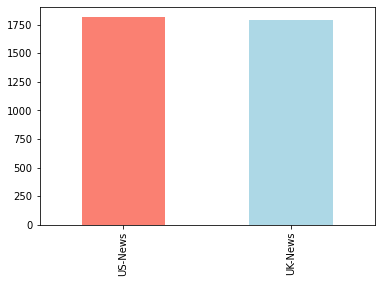

In [107]:
print(' The number of news training samples are(3610 * 0.7) = ', X_US_UK_train.shape[0])

# Plot the value_counts with a bar graph 
y_US_UK.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

### Category : US_News & Politics

In [48]:
# Spliting datta into training & testing sets

X_US_Politics_train, X_US_Politics_test, y_US_Politics_train, y_US_Politics_test = train_test_split(X_US_Politics,  y_US_Politics , test_size = 0.3, random_state = 42)
X_US_Politics_train.shape, X_US_Politics_test.shape, y_US_Politics_train.shape, y_US_Politics_test.shape

((2536, 8190), (1087, 8190), (2536,), (1087,))

 The number of news training samples are(3623 * 0.7) =  2536


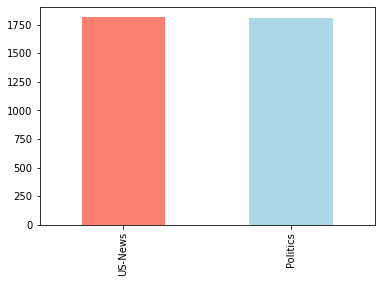

In [106]:
print(' The number of news training samples are(3623 * 0.7) = ', X_US_Politics_train.shape[0])

# Plot the value_counts with a bar graph
y_US_Politics.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

### Category : UK_News & Politics

In [50]:
# Spliting datta into training & testing sets

X_UK_Politic_train, X_UK_Politic_test, y_UK_Politic_train, y_UK_Politic_test = train_test_split(X_UK_Politic,  y_UK_Politic , test_size = 0.3, random_state = 42)
X_UK_Politic_train.shape, X_UK_Politic_test.shape, y_UK_Politic_train.shape, y_UK_Politic_test.shape


((2522, 7943), (1081, 7943), (2522,), (1081,))

 The number of news training samples are(3603 * 0.7) =  2522


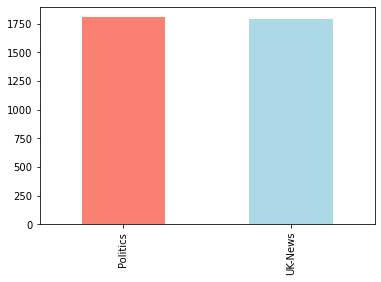

In [108]:
print(' The number of news training samples are(3603 * 0.7) = ', X_UK_Politic_train.shape[0])
y_UK_Politic.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

### Binary Classification Model Choices

The prepared data is used to fit the model. The below binary classifications are selected to compare the result. (this link https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html is used to chose which model may be usable for news clasification)
* 1- Logestic Regression
* 2- K_Nearest Neighbors
* 3- RandomFores
- All of these 3 models, implement the same method for fitting news article and also evaluation part, so a dictionary should be created to make these steps easier.

In [142]:
# put 3 models into a dict 
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit & score models
def fit_score(models, X_train, X_test, y_train, y_test):

    # random sees for seeing the same result
    np.random.seed(42)
    # Make a dict to store models' scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to news data
        model.fit(X_train, y_train)
        # Evaluate the model and append to list
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [162]:
# Fitting the model on all 3 combination pairs
# 1- US_UK
model_scores_US_UK = fit_score(models =models, X_train = X_US_UK_train, X_test = X_US_UK_test, y_train = y_US_UK_train, y_test = y_US_UK_test)

# 2- US_Politics
model_scores_US_Politics = fit_score(models =models, X_train = X_US_Politics_train, X_test = X_US_Politics_test, y_train = y_US_Politics_train, y_test = y_US_Politics_test)

# 3- # UK_Politi
model_scores_UK_Politics = fit_score(models =models, X_train = X_UK_Politic_train, X_test = X_UK_Politic_test, y_train = y_UK_Politic_train, y_test = y_UK_Politic_test)


In [167]:
model_scores_US_UK , model_scores_US_Politics , model_scores_UK_Politics

({'KNN': 0.8614958448753463,
  'Logistic Regression': 0.9529085872576177,
  'Random Forest': 0.9464450600184672},
 {'KNN': 0.9291628334866605,
  'Logistic Regression': 0.9770009199632015,
  'Random Forest': 0.9742410303587856},
 {'KNN': 0.7252543940795559,
  'Logistic Regression': 0.8640148011100832,
  'Random Forest': 0.8686401480111008})

### Binary Classification Model Comparision

These  3 bar chart shows which models had a better performance comparing to others. 
- **US_UK** : Logestic Regression
- **US_Politics** : Logestic Regression
- **UK_Politics** : Random Forest

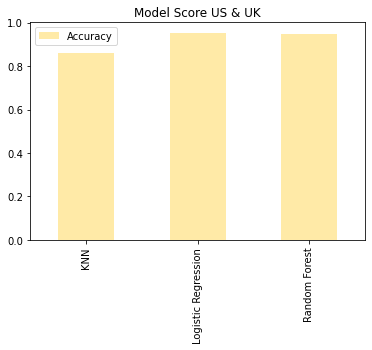

In [164]:
model_compare_US_UK = pd.DataFrame(model_scores_US_UK, index = ['Accuracy'])
bar_color = ['#ffeaa7']
model_compare_US_UK.T.plot.bar(color = bar_color )
plt.title('Model Score US & UK', fontsize = 12);

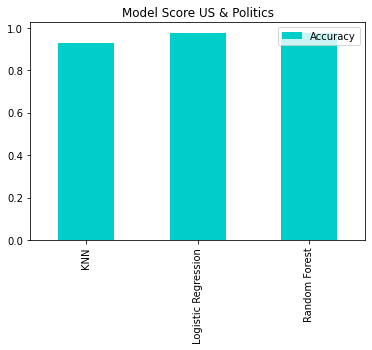

In [165]:
model_compare_US_Politics = pd.DataFrame(model_scores_US_Politics, index = ['Accuracy'])
bar_color = ['#00cec9']
model_compare_US_Politics.T.plot.bar(color = bar_color )
plt.title('Model Score US & Politics', fontsize = 12);

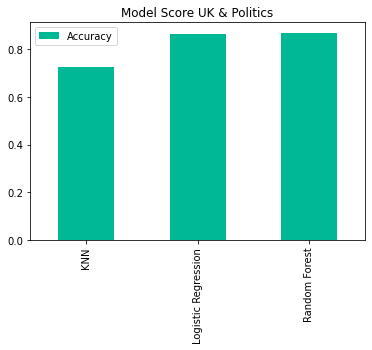

In [166]:
model_compare_UK_Politics = pd.DataFrame(model_scores_UK_Politics, index = ['Accuracy'])
bar_color = ['#00b894']
model_compare_UK_Politics.T.plot.bar(color = bar_color )
plt.title('Model Score UK & Politics', fontsize = 12);

## <font color='green'> Evaluation </font> 

##  1. Accuracy Evaluation:

## Improving Model Prediction by Hyperparameter tuning

In all of the above bar graphs,  we would try to change the hyperparameteres to see if we could increase the performance.
As explained, LogesticRegression  had the better performance in almost all of the aboved graphs, so we select it to see if we can improve it. 

### Improving  LogisticRegresion By RandomizedSearchCV
This link is used for changing hyperparameters
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

#### LogisticRegresion Hyperparameter Setup

In [279]:
# Creating a dictionary of different hyper parameters

'''
LogisticRegresion
'''
# C: float --> Inverse of regularization Strenght (Smaller Values--> Stronger Regularization)
# Solver : Algorithm to use in the Optimization problem
# logspace : Return numbers soaced evenly on a log scale

log_reg_dict = {"C": np.logspace(-4, 4, 20),
                "solver": ["saga"],
                'tol' : [1e-2], 'max_iter':[200],'random_state':[0]}

#### RandomizedSearchCV Tunning

## Model Evaluation with New HyperParameters

In [303]:
# RandomizedSearchCV Tunning
np.random.seed(42)  # Setup random seed

# Random HyperParameter Search Setup
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_dict,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose =True)

# Create function to fit & score models for new hyperparameters
def fit_score_rs_cv(model, X_train, X_test, y_train, y_test, title , old_score):

    # random sees for seeing the same result
    np.random.seed(42)
    # Make a dict to store models' scores
    model_scores = {}
    # fit the model to news data
    model_fit = model.fit(X_train, y_train)
    # Evaluate the model and append to list
    model_scores = model.score(X_test, y_test)
    
    print('The LOGISTICREGRESSION model is tunning by RandomizedSearchCV\n')
    print('\n---------------------------------------------------------\n')
    print ('New_Model_scores for %s is :%s' %( title, model_scores ))
    print('\n---------------------------------------------------------\n')
    
    print ('%s Before Tuning the score was : %s \n After Tuning the score is : %s \nThe model is improved by : %s \n'% (title, old_score, model_scores , ((model_scores- old_score)*100)))
    print('\n---------------------------------------------------------\n')
    return model_scores 

In [304]:
# Fitting the model on all 3 combination pairs
# 1- US_UK
model_rs_cv_scores_US_UK = fit_score_rs_cv(model =rs_log_reg, X_train = X_US_UK_train, X_test = X_US_UK_test, y_train = y_US_UK_train, y_test = y_US_UK_test, title ='US_UK_News',  old_score =model_scores_US_UK['Logistic Regression'])

# 2- US_Politics
model_rs_cv_scores_US_Politics = fit_score_rs_cv(model =rs_log_reg, X_train = X_US_Politics_train, X_test = X_US_Politics_test, y_train = y_US_Politics_train, y_test = y_US_Politics_test, title ='US_Politics_News',  old_score = model_scores_US_Politics['Logistic Regression'] )

# 3- # UK_Politi
model_rs_cv_scores_UK_Politics = fit_score_rs_cv(model = rs_log_reg, X_train = X_UK_Politic_train, X_test = X_UK_Politic_test, y_train = y_UK_Politic_train, y_test = y_UK_Politic_test, title ='UK_Politics_News',  old_score = model_scores_UK_Politics['Logistic Regression'])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The LOGISTICREGRESSION model is tunning by RandomizedSearchCV


---------------------------------------------------------

New_Model_scores for US_UK_News is :0.9547553093259464

---------------------------------------------------------

US_UK_News Before Tuning the score was : 0.9529085872576177 
 After Tuning the score is : 0.9547553093259464 
The model is improved by : 0.1846722068328699 


---------------------------------------------------------

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The LOGISTICREGRESSION model is tunning by RandomizedSearchCV


---------------------------------------------------------

New_Model_scores for US_Politics_News is :0.9770009199632015

---------------------------------------------------------

US_Politics_News Before Tuning the score was : 0.9770009199632015 
 After Tuning the score is : 0.9770009199632015 
The model is improved by : 0.0 


--------------------------

## 2. ROC Curve & AUC Score
Comparision of True Postive Rate VS False Positive Rate

In [315]:
## Evaluation our Tuned LogisticRegresion Machine Learning Binary Classification Model

# Prediction with Tuned Model giving the test data to predict y

y_US_UK_predict = rs_log_reg.fit(X_US_UK_train, y_US_UK_train).predict (X_US_UK_test)
y_US_Politics_predict = rs_log_reg.fit(X_US_Politics_train , y_US_Politics_train).predict (X_US_Politics_test)
y_UK_Politic_predict =rs_log_reg.fit( X_UK_Politic_train ,  y_UK_Politic_train).predict ( X_UK_Politic_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Based on the calculated AUC, the model is working very well !! AUC is almost near 1

Plot 1: ROC CURVE US_UK
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Plot 2: ROC CURVE US_Politics
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Plot 3: ROC CURVE UK_Politics
Fitting 5 folds for each of 20 candidates, totalling 100 fits


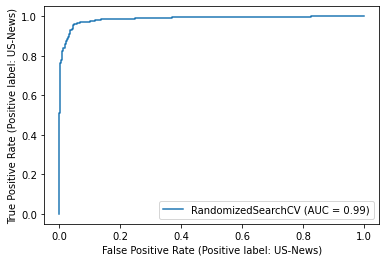

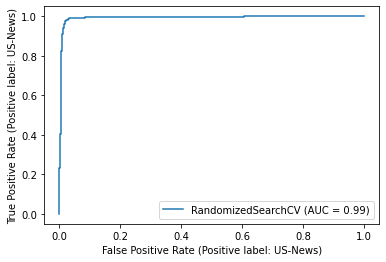

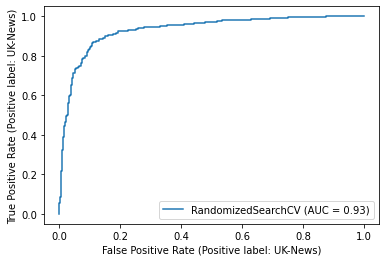

In [326]:
# Plot ROC Curve and Calculate AUC Matrix

print('Plot 1: ROC CURVE US_UK')
plot_roc_curve(rs_log_reg.fit(X_US_UK_train, y_US_UK_train), X_US_UK_test, y_US_UK_test)

print('Plot 2: ROC CURVE US_Politics')
plot_roc_curve(rs_log_reg.fit(X_US_Politics_train , y_US_Politics_train), X_US_Politics_test, y_US_Politics_test)

print('Plot 3: ROC CURVE UK_Politics')
plot_roc_curve(rs_log_reg.fit( X_UK_Politic_train ,  y_UK_Politic_train), X_UK_Politic_test, y_UK_Politic_test);

## 3. Confiusion Matrix

Confusion matrix is used to compare the actual label VS predict label

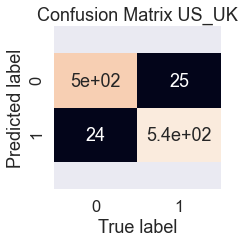

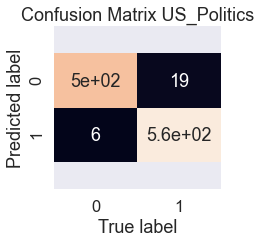

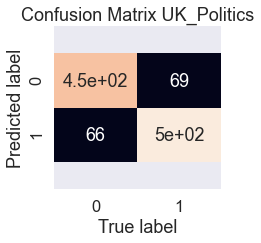

In [332]:
# Plot Confusion Matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds, title):

    fig, ax = plt.subplots(figsize=(3, 3))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), #using seaborn heatmap
                     annot=True, # annonate
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(title)
    # Fix botom & top to see numbers inside
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)



plot_conf_mat(y_US_UK_test, y_US_UK_predict, 'Confusion Matrix US_UK')
plot_conf_mat(y_US_Politics_test, y_US_Politics_predict, 'Confusion Matrix US_Politics')
plot_conf_mat(y_UK_Politic_test, y_UK_Politic_predict ,'Confusion Matrix UK_Politics')

# Task 3. Multi-Class Text Classification

Using all three categories (A,B,C) that you have selected

## <font color='green'> IV Data Preperation and Evaluation </font> 

Appropriate preprocessing steps to create a numeric representation of the documents for these three categories have been already apllied in Task 2, please refer to Task2-Data Preperation & visualisation. Here, we would use the prepared numeric representation to train, test and evaluate our model.

## <font color='green'> V & VI Training & Testing Data </font> 

The explanation for train, test part would be the same as Task 2, while we are facing 3 class in this task

### Splitting News Data into Training & Testing Sets

In this section, we want to divide our dataset to train & test sets. We consider 30% of the data for testing session and the rest for training our model. 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(tokenize, concat_data.Label,
                                                    test_size = 0.3, random_state = 88)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3792, 10326), (1626, 10326), (3792,), (1626,))

### Selected Model: SVC

SVM constructs a hyperplane in multidimensional space to separate different classes to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes (Wikipedia)
- C-Support Vector Classification:
The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

In [341]:
# train the model on train set
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [344]:
# Scoreing the SVC model
model.score (X_test, y_test)

0.8400984009840098

## Improving SVC By GridSearchCV

In task 2, RandomizedSearch CV was used, while I will use Gridsearch CV. The difference between them is that GridSearchcv tries evey single combination of hyperpat=rameters and save the best, while RandomizedSearch CV tries n_iterate combinations of hyperparaameteris

In [366]:
%%time
%%capture test

param_grid = {'C': [0.1, 1, 10, 100, 1000], # defining parameter range
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # higher value of gamma will exactly fit the training datase
              'kernel': ['rbf']} # The main function of the kernel is to transform the given dataset input data into the required form
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3);
  
# fitting the model for grid search
grid.fit(X_train, y_train);

Wall time: 25min 1s


In [370]:
#print(test)

In [356]:
grid.best_params_ 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [357]:
# Scoreing the SVC model after changing hyper_parameter by GridSearchCV
grid.score (X_test, y_test)

0.8591635916359164

If we compare the result before and after hyperparameter tunning --> 2% growth is observed. our grid only has a limited number of combination ( folds for each of 25 candidates, totalling 125 fits) and a better processor or longer run is required to change the hypermarameters

## <font color='green'> Evaluation </font> 

In this section, the evaluation metrics try to be chosen based on the ones that we did not used in Task 2. 

In [397]:
y_pred = grid.predict(X_test)

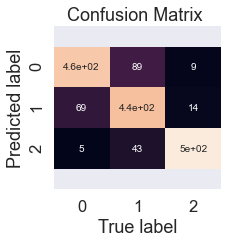

In [398]:
# Confusion matrix creation
plot_conf_mat(y_test, y_pred , 'Confusion Matrix ')

## Classification Report

- **Precision:** : Porportion of positive identification which were actually correct
- **Recall** : Poportion of actually positive which were correcly classified
- **F1_Score** : Combination of precision & Recall
- **Accuracy** : The Avg precision, recall and F1_score between classes
- **Weighted Avg** : The weighted Avg precision, recall and F1_score between classes
    - As we see in classification report, the best performance was seen in US_news. Also in task 2 we realise that US_News used more text to announce their news.

In [368]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

    Politics       0.86      0.82      0.84       553
     UK-News       0.77      0.84      0.80       525
     US-News       0.96      0.91      0.93       548

    accuracy                           0.86      1626
   macro avg       0.86      0.86      0.86      1626
weighted avg       0.86      0.86      0.86      1626



## Classification Report Using Cross-Validation

In this section, a new svm.SVC model is created based on the best parameters and I use the whole clean datasets. It seems that with this approch and using 5 part for training the accuracy increased by 2.2%.

In [372]:
# Recreate a model with best parameters
clf = svm.SVC (C = 100, gamma= 0.01, kernel= 'rbf') # best params used 

#### Cross_validation accuracy

In [394]:
%%time
cv_acc = cross_val_score(clf,
                         tokenize, # using all features
                         concat_data.Label, # using all labels
                         cv = 5,
                         scoring = 'accuracy')
print ('Cross_validation Accuracy Score for News datasets for 5 fold are\n : ', cv_acc )
print ('The Average of Cross_validation Accuracy Score for News datasets for 5 fold is : ', np.mean(cv_acc) )

Cross_validation Accuracy Score for News datasets for 5 fold are
 :  [0.86623616 0.84225092 0.85885609 0.86241921 0.88088643]
The Average of Cross_validation Accuracy Score for News datasets for 5 fold is :  0.8621297611868085
Wall time: 1min 31s


# Summary

In this assignment, the given website was scraped using Beautifulsoup library. After that, 3 categories selected and data preperation phase completed for both Task 2 & Task 3. It seems that US_News tend to use more words to explain their titles and snippets. 
In the next phase the data was changed from text to number representation to prepare the news datasets for the training phase.
In Binary Classification, 3 models compered and among those LinearRegression showed a better results and this model chose for further steps. Hyperparameter changed to improve the model and also differnt evaluation metrics calculated to give us a better understanding of the model. At the end SVC model for multi class classification was selected and all the steps repeated to analyse our model. Using Cross_val by using svm.SVC (C = 100, gamma= 0.01, kernel= 'rbf') model shows the best sccuracy result. 